In [2]:
# Importing useful library

import pandas as pd

In [3]:
# Reading and displalying my data

df = pd.read_csv("raw_data.csv")
df.head()

,Invoice,Silo,Status,Client,Market,Position,Start,Stop,Dur,Elap,...,CPL-ACT,Dur-C,Elap-C,Target,Leads,Gross,CPL-G,C-Actual,CPL-A,CLF
0,160995,S41,Running,K-Line,All Inclusive,Driver / Drivers,101,131,31,18,...,29.28,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
1,160995,S26,Running,K-Line,All Inclusive,Driver / Drivers,101,131,31,18,...,17.21,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
2,160995,S05,Running,K-Line,All Inclusive,Driver / Drivers,101,131,31,18,...,27.00,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
3,160995,S01,Running,K-Line,All Inclusive,Driver / Drivers,101,131,31,18,...,29.62,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
4,160925,S01,Running,E-Line,Hiring Area - OTR,Driver / Drivers,101,131,31,18,...,91.25,31,18,5,9,700.0,45.16,181.25,20.14,3.10


In [4]:
# Refining the start and end columns

df.loc[df['Start'] == 101,'Start'] = '1/01'
df.loc[df['Stop'] == 131,'Stop'] = '1/31'
df.head()

,Invoice,Silo,Status,Client,Market,Position,Start,Stop,Dur,Elap,...,CPL-ACT,Dur-C,Elap-C,Target,Leads,Gross,CPL-G,C-Actual,CPL-A,CLF
0,160995,S41,Running,K-Line,All Inclusive,Driver / Drivers,1/01,1/31,31,18,...,29.28,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
1,160995,S26,Running,K-Line,All Inclusive,Driver / Drivers,1/01,1/31,31,18,...,17.21,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
2,160995,S05,Running,K-Line,All Inclusive,Driver / Drivers,1/01,1/31,31,18,...,27.00,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
3,160995,S01,Running,K-Line,All Inclusive,Driver / Drivers,1/01,1/31,31,18,...,29.62,31,18,59,190,6995.0,21.38,1323.17,6.96,5.55
4,160925,S01,Running,E-Line,Hiring Area - OTR,Driver / Drivers,1/01,1/31,31,18,...,91.25,31,18,5,9,700.0,45.16,181.25,20.14,3.10


In [9]:
with open('check.txt','w') as f:
    f.write(df.to_string())

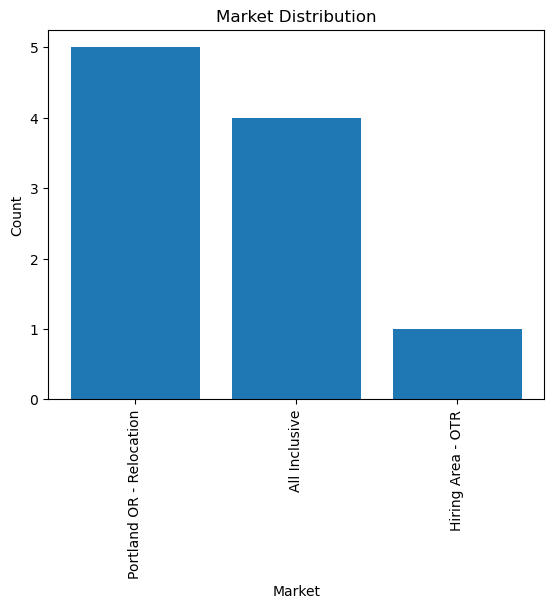

In [10]:
import matplotlib.pyplot as plt

market_counts = df['Market'].value_counts()

plt.bar(market_counts.index, market_counts.values)
plt.title('Market Distribution')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

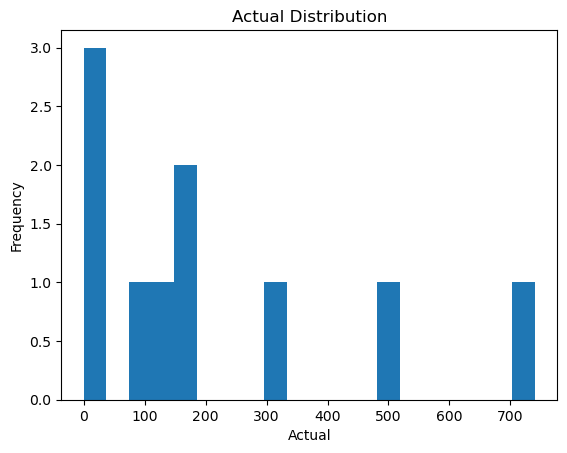

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['Actual'], bins=20)
plt.title('Actual Distribution')
plt.xlabel('Actual')
plt.ylabel('Frequency')
plt.show()

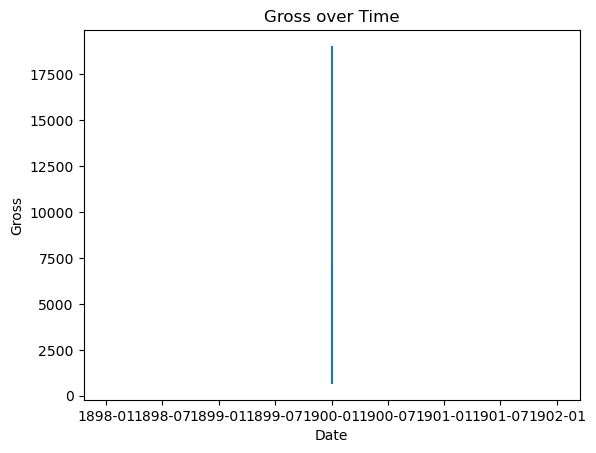

In [12]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Start'], format='%m/%d')

plt.plot(df['Date'], df['Gross'])
plt.title('Gross over Time')
plt.xlabel('Date')
plt.ylabel('Gross')
plt.show()

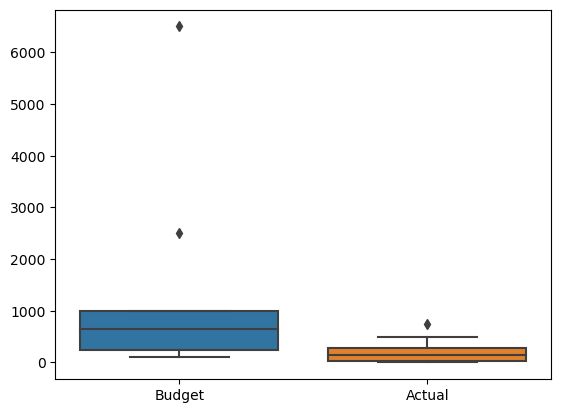

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['Budget', 'Actual']])
plt.show()

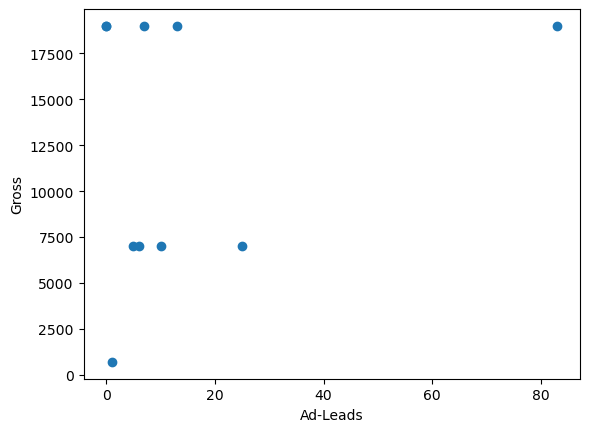

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df['Ad-Leads'], df['Gross'])
plt.xlabel('Ad-Leads')
plt.ylabel('Gross')
plt.show()

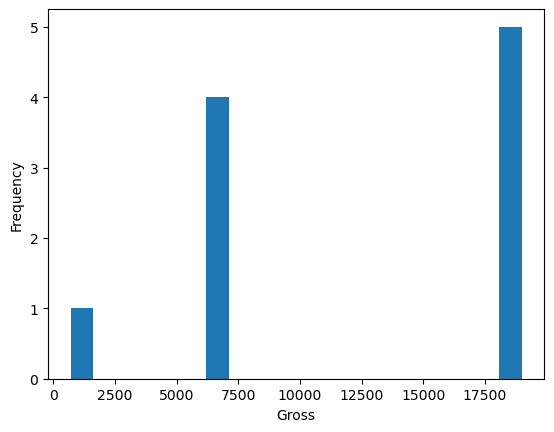

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['Gross'], bins=20)
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.show()

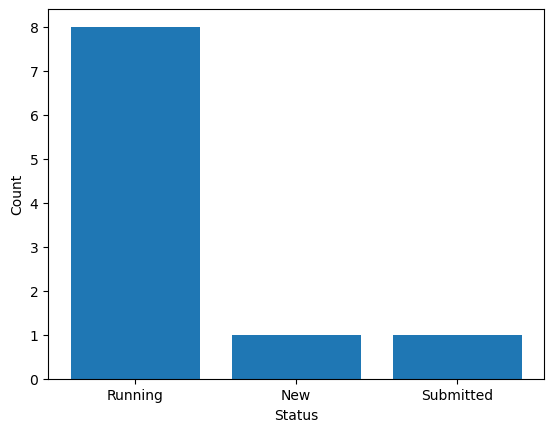

In [16]:
import matplotlib.pyplot as plt

status_count = df['Status'].value_counts()
plt.bar(status_count.index, status_count.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

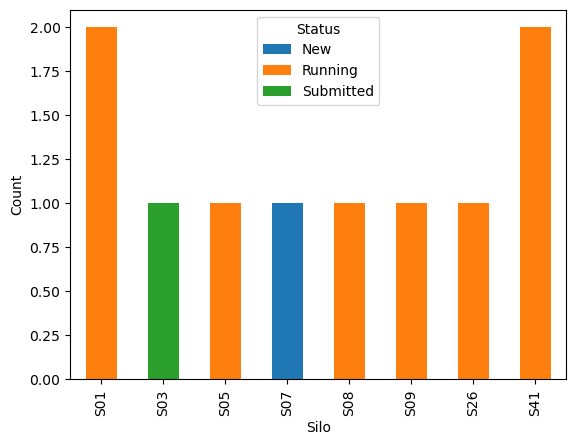

In [17]:
import matplotlib.pyplot as plt

status_by_silo = df.groupby(['Silo', 'Status']).size().unstack(fill_value=0)
status_by_silo.plot(kind='bar', stacked=True)
plt.xlabel('Silo')
plt.ylabel('Count')
plt.show()

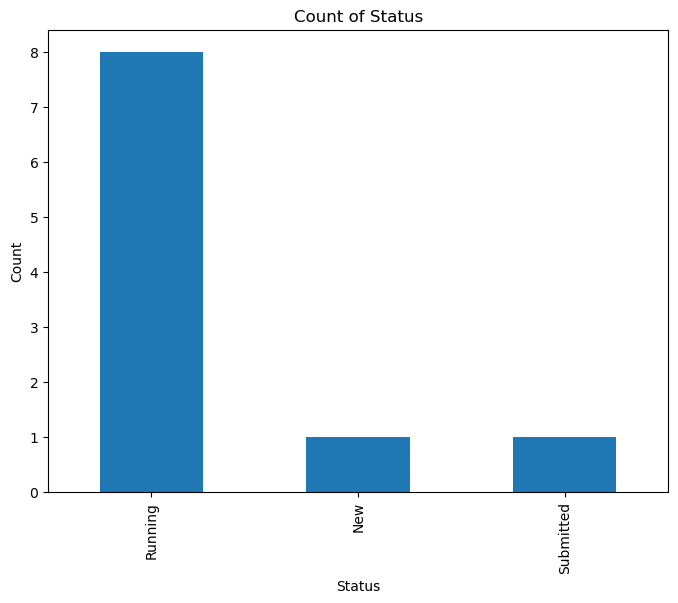

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df['Status'].value_counts().plot(kind='bar')
plt.title('Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

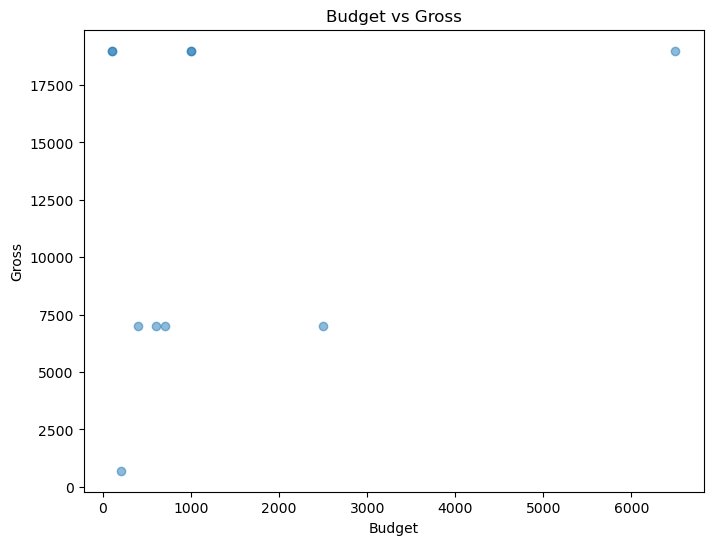

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(df['Budget'], df['Gross'], alpha=0.5)
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()


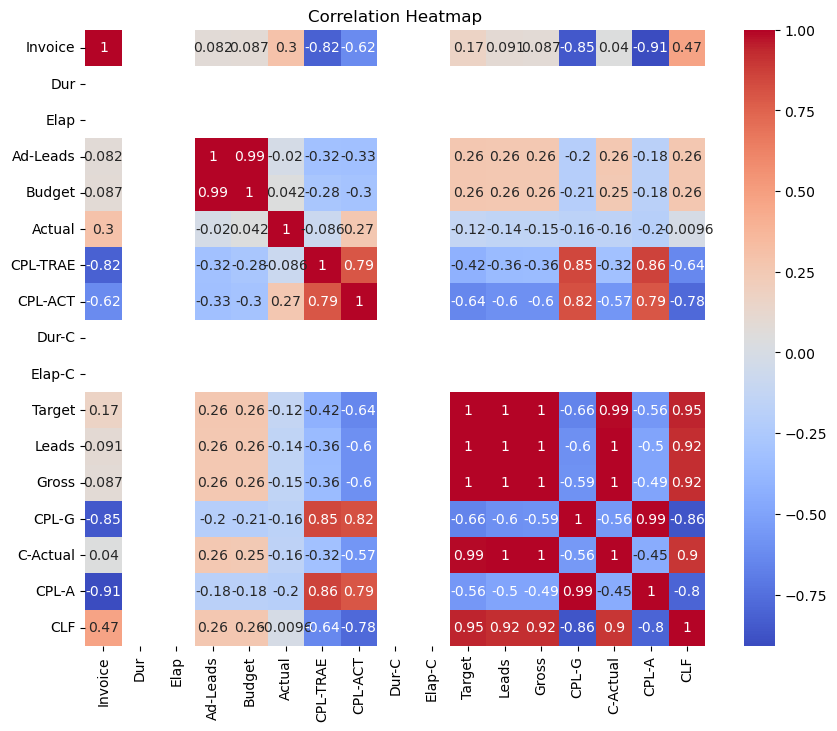

In [20]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()